In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import pickle

In [2]:
df = pd.read_csv('inclusive_features_usage(cleaned)1.csv')
df

,Unnamed: 0,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,user_characteristics
0,0,user_4737,Multilingual,60.77,4,4,Teenager,Non-Binary,LGBTQ+,Teenager/Non-Binary/LGBTQ+
1,1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,Straight,Professional/Non-Binary/Straight
2,2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,Straight,Adult/Female/Straight
3,3,user_5519,Colorblind Mode,26.36,3,1,Adult,Non-Binary,LGBTQ+,Adult/Non-Binary/LGBTQ+
4,4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,Straight,Young Adult/Male/Straight
...,...,...,...,...,...,...,...,...,...,...
6353,9987,user_3468,High Contrast Mode,84.16,3,3,Senior,Male,Straight,Senior/Male/Straight
6354,9988,user_1210,Visual Aid,6.56,4,2,Teenager,Non-Binary,Person of Color,Teenager/Non-Binary/Person of Color
6355,9992,user_9099,Text-to-Speech,93.93,4,5,Professional,Non-Binary,LGBTQ+,Professional/Non-Binary/LGBTQ+
6356,9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,Straight,Adult/Non-Binary/Straight


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6358 entries, 0 to 6357
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              6358 non-null   int64  
 1   user_id                 6358 non-null   object 
 2   feature_used            6358 non-null   object 
 3   session_duration        6358 non-null   float64
 4   engagement_score        6358 non-null   int64  
 5   accessibility_settings  6358 non-null   int64  
 6   age_group               6358 non-null   object 
 7   gender                  6358 non-null   object 
 8   additional_attributes   6358 non-null   object 
 9   user_characteristics    6358 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 496.8+ KB


In [4]:
df.loc[df['accessibility_settings'] < 3, 'high_accessibility_user'] = False
df.loc[df['accessibility_settings'] >= 3, 'high_accessibility_user'] = True

C:\Users\cjean\AppData\Local\Temp\ipykernel_13044\2094636936.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['accessibility_settings'] < 3, 'high_accessibility_user'] = False


In [5]:
df

,Unnamed: 0,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,user_characteristics,high_accessibility_user
0,0,user_4737,Multilingual,60.77,4,4,Teenager,Non-Binary,LGBTQ+,Teenager/Non-Binary/LGBTQ+,True
1,1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,Straight,Professional/Non-Binary/Straight,True
2,2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,Straight,Adult/Female/Straight,False
3,3,user_5519,Colorblind Mode,26.36,3,1,Adult,Non-Binary,LGBTQ+,Adult/Non-Binary/LGBTQ+,False
4,4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,Straight,Young Adult/Male/Straight,False
...,...,...,...,...,...,...,...,...,...,...,...
6353,9987,user_3468,High Contrast Mode,84.16,3,3,Senior,Male,Straight,Senior/Male/Straight,True
6354,9988,user_1210,Visual Aid,6.56,4,2,Teenager,Non-Binary,Person of Color,Teenager/Non-Binary/Person of Color,False
6355,9992,user_9099,Text-to-Speech,93.93,4,5,Professional,Non-Binary,LGBTQ+,Professional/Non-Binary/LGBTQ+,True
6356,9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,Straight,Adult/Non-Binary/Straight,True


In [6]:
float = df['high_accessibility_user'].astype(float)
float

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
6353    1.0
6354    0.0
6355    1.0
6356    1.0
6357    0.0
Name: high_accessibility_user, Length: 6358, dtype: float64

In [7]:
df

,Unnamed: 0,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,user_characteristics,high_accessibility_user
0,0,user_4737,Multilingual,60.77,4,4,Teenager,Non-Binary,LGBTQ+,Teenager/Non-Binary/LGBTQ+,True
1,1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,Straight,Professional/Non-Binary/Straight,True
2,2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,Straight,Adult/Female/Straight,False
3,3,user_5519,Colorblind Mode,26.36,3,1,Adult,Non-Binary,LGBTQ+,Adult/Non-Binary/LGBTQ+,False
4,4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,Straight,Young Adult/Male/Straight,False
...,...,...,...,...,...,...,...,...,...,...,...
6353,9987,user_3468,High Contrast Mode,84.16,3,3,Senior,Male,Straight,Senior/Male/Straight,True
6354,9988,user_1210,Visual Aid,6.56,4,2,Teenager,Non-Binary,Person of Color,Teenager/Non-Binary/Person of Color,False
6355,9992,user_9099,Text-to-Speech,93.93,4,5,Professional,Non-Binary,LGBTQ+,Professional/Non-Binary/LGBTQ+,True
6356,9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,Straight,Adult/Non-Binary/Straight,True


In [8]:
droped_cols = df.drop(columns=['Unnamed: 0', 'user_id', 'session_duration', 'accessibility_settings', 'user_characteristics'])
droped_cols

,feature_used,engagement_score,age_group,gender,additional_attributes,high_accessibility_user
0,Multilingual,4,Teenager,Non-Binary,LGBTQ+,True
1,Text-to-Speech,5,Professional,Non-Binary,Straight,True
2,Colorblind Mode,2,Adult,Female,Straight,False
3,Colorblind Mode,3,Adult,Non-Binary,LGBTQ+,False
4,High Contrast Mode,5,Young Adult,Male,Straight,False
...,...,...,...,...,...,...
6353,High Contrast Mode,3,Senior,Male,Straight,True
6354,Visual Aid,4,Teenager,Non-Binary,Person of Color,False
6355,Text-to-Speech,4,Professional,Non-Binary,LGBTQ+,True
6356,Visual Aid,1,Adult,Non-Binary,Straight,True


In [9]:
dummies = pd.get_dummies(droped_cols)
dummies

,engagement_score,feature_used_Colorblind Mode,feature_used_High Contrast Mode,feature_used_Multilingual,feature_used_Text-to-Speech,feature_used_Visual Aid,age_group_Adult,age_group_Professional,age_group_Senior,age_group_Teenager,age_group_Young Adult,gender_Female,gender_Male,gender_Non-Binary,additional_attributes_LGBTQ+,additional_attributes_Person of Color,additional_attributes_Straight,high_accessibility_user_False,high_accessibility_user_True
0,4,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True
1,5,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True
2,2,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False
3,3,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False
4,5,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,3,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
6354,4,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False
6355,4,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,True
6356,1,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True


In [10]:
engagement_score_droped = dummies.drop(columns=['engagement_score'])
engagement_score_droped

,feature_used_Colorblind Mode,feature_used_High Contrast Mode,feature_used_Multilingual,feature_used_Text-to-Speech,feature_used_Visual Aid,age_group_Adult,age_group_Professional,age_group_Senior,age_group_Teenager,age_group_Young Adult,gender_Female,gender_Male,gender_Non-Binary,additional_attributes_LGBTQ+,additional_attributes_Person of Color,additional_attributes_Straight,high_accessibility_user_False,high_accessibility_user_True
0,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True
1,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True
2,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False
3,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False
4,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
6354,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False
6355,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,True
6356,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True


In [11]:
engagement_score = dummies['engagement_score']
e = pd.DataFrame(engagement_score, columns=['engagement_score'])
e

,engagement_score
0,4
1,5
2,2
3,3
4,5
...,...
6353,3
6354,4
6355,4
6356,1


In [12]:
floats = engagement_score_droped.astype(int)
floats

,feature_used_Colorblind Mode,feature_used_High Contrast Mode,feature_used_Multilingual,feature_used_Text-to-Speech,feature_used_Visual Aid,age_group_Adult,age_group_Professional,age_group_Senior,age_group_Teenager,age_group_Young Adult,gender_Female,gender_Male,gender_Non-Binary,additional_attributes_LGBTQ+,additional_attributes_Person of Color,additional_attributes_Straight,high_accessibility_user_False,high_accessibility_user_True
0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
3,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
6354,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
6355,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1
6356,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1


In [13]:
join_floaties = e.join(floats)
join_floaties

,engagement_score,feature_used_Colorblind Mode,feature_used_High Contrast Mode,feature_used_Multilingual,feature_used_Text-to-Speech,feature_used_Visual Aid,age_group_Adult,age_group_Professional,age_group_Senior,age_group_Teenager,age_group_Young Adult,gender_Female,gender_Male,gender_Non-Binary,additional_attributes_LGBTQ+,additional_attributes_Person of Color,additional_attributes_Straight,high_accessibility_user_False,high_accessibility_user_True
0,4,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,5,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
2,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
3,3,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
4,5,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
6354,4,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
6355,4,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1
6356,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1


In [14]:
join_floaties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6358 entries, 0 to 6357
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   engagement_score                       6358 non-null   int64
 1   feature_used_Colorblind Mode           6358 non-null   int32
 2   feature_used_High Contrast Mode        6358 non-null   int32
 3   feature_used_Multilingual              6358 non-null   int32
 4   feature_used_Text-to-Speech            6358 non-null   int32
 5   feature_used_Visual Aid                6358 non-null   int32
 6   age_group_Adult                        6358 non-null   int32
 7   age_group_Professional                 6358 non-null   int32
 8   age_group_Senior                       6358 non-null   int32
 9   age_group_Teenager                     6358 non-null   int32
 10  age_group_Young Adult                  6358 non-null   int32
 11  gender_Female                 

In [15]:
X = np.array(join_floaties.drop(columns=['high_accessibility_user_False', 'high_accessibility_user_True']))
y = np.array(join_floaties[['high_accessibility_user_False', 'high_accessibility_user_True']])

In [16]:
X

array([[4, 0, 0, ..., 1, 0, 0],
       [5, 0, 0, ..., 0, 0, 1],
       [2, 1, 0, ..., 0, 0, 1],
       ...,
       [4, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [2, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [17]:
y

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train

array([[3, 1, 0, ..., 0, 1, 0],
       [3, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [5, 1, 0, ..., 0, 1, 0],
       [4, 1, 0, ..., 1, 0, 0],
       [5, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [20]:
y_train

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [21]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
y_pred = dtc.predict(X_test)
y_pred

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [24]:
y_test

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [25]:
confusion_mat = (confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
confusion_mat

array([[375, 243],
       [391, 263]], dtype=int64)

<Axes: >

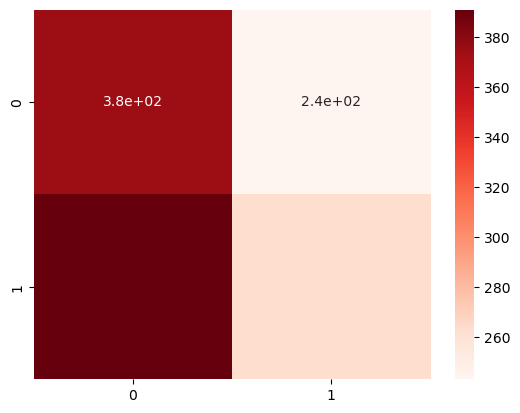

In [26]:
sns.heatmap(confusion_mat,
            cmap='Reds',
            #xticklabels=['Prediction: No (0)', 'Prediction: Yes (1)'],
            #yticklabels=['Actual: No (0)', 'Actual: Yes (1)'],
            annot=True)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.46      0.47       618
           1       0.52      0.40      0.45       654

   micro avg       0.50      0.43      0.46      1272
   macro avg       0.50      0.43      0.46      1272
weighted avg       0.50      0.43      0.46      1272
 samples avg       0.43      0.43      0.43      1272



C:\Users\cjean\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
data = pd.DataFrame(confusion_mat)
data

,0,1
0,375,243
1,391,263


In [29]:
TN = data[0].iloc[0]
TP = data[1].iloc[1]
FN = data[0].iloc[1]
FP = data[1].iloc[0]

accuracy = (TN + TP) / (TN + FP + FN + TP)
accuracy

0.5015723270440252

In [30]:
feat_used = input('feature_used: ')
engage_score = input('engagement_score: ')
engage_score_2 = int(engage_score)
a_group = input('age_group: ')
gen = input('gender: ')
add_attributes = input('additional_attributes: ')

class User:
    def __init__(self, feature_used, engagement_score, age_group, gender, additional_attributes):
        self.feature_used = feature_used
        self.engagement_score = engagement_score
        self.age_group = age_group
        self.gender = gender
        self.additional_attributes = additional_attributes

user = User(feat_used, engage_score_2, a_group, gen, add_attributes)

feature_used_data = user.feature_used
engagement_score_data = user.engagement_score
age_group_data = user.age_group
gender_data = user.gender
additional_attributes_data = user.additional_attributes

dictionary = {'feature_used': feature_used_data,
              'engagement_score': engagement_score_data,
              'age_group': age_group_data,
              'gender': gender_data,
              'additional_attributes': additional_attributes_data}

characteristics = pd.DataFrame(dictionary, index=[0])
characteristics

feature_used:  Text-to-Speech
engagement_score:  4
age_group:  Teenager
gender:  Female
additional_attributes:  Person of Color


,feature_used,engagement_score,age_group,gender,additional_attributes
0,Text-to-Speech,4,Teenager,Female,Person of Color


In [31]:
characteristics['engagement_score'].info()

<class 'pandas.core.series.Series'>
Index: 1 entries, 0 to 0
Series name: engagement_score
Non-Null Count  Dtype
--------------  -----
1 non-null      int64
dtypes: int64(1)
memory usage: 16.0 bytes


In [32]:
dum_char = pd.get_dummies(characteristics)
dum_char

,engagement_score,feature_used_Text-to-Speech,age_group_Teenager,gender_Female,additional_attributes_Person of Color
0,4,True,True,True,True


In [33]:
droped_cols

,feature_used,engagement_score,age_group,gender,additional_attributes,high_accessibility_user
0,Multilingual,4,Teenager,Non-Binary,LGBTQ+,True
1,Text-to-Speech,5,Professional,Non-Binary,Straight,True
2,Colorblind Mode,2,Adult,Female,Straight,False
3,Colorblind Mode,3,Adult,Non-Binary,LGBTQ+,False
4,High Contrast Mode,5,Young Adult,Male,Straight,False
...,...,...,...,...,...,...
6353,High Contrast Mode,3,Senior,Male,Straight,True
6354,Visual Aid,4,Teenager,Non-Binary,Person of Color,False
6355,Text-to-Speech,4,Professional,Non-Binary,LGBTQ+,True
6356,Visual Aid,1,Adult,Non-Binary,Straight,True


In [34]:
droped_cols['additional_attributes'].value_counts()

additional_attributes
Straight           3791
Person of Color    1292
LGBTQ+             1275
Name: count, dtype: int64

In [35]:
droped_cols['high_accessibility_user'].value_counts()

high_accessibility_user
False    3244
True     3114
Name: count, dtype: int64

In [36]:
# We will use later to join data

eng_data = pd.DataFrame(characteristics['engagement_score'], index=[0])
eng_data

,engagement_score
0,4


In [37]:
def if_elif_feature_used():
    if feature_used_data == 'Colorblind Mode':
        fu_values = {'feature_used_Colorblind Mode': 1,
                     'feature_used_High Contrast Mode': 0,
                     'feature_used_Multilingual': 0,
                     'feature_used_Text-to-Speech': 0,
                     'feature_used_Visual Aid': 0}

    elif feature_used_data == 'High Contrast Mode':
        fu_values = {'feature_used_Colorblind Mode': 0,
                     'feature_used_High Contrast Mode': 1,
                     'feature_used_Multilingual': 0,
                     'feature_used_Text-to-Speech': 0,
                     'feature_used_Visual Aid': 0}

    elif feature_used_data == 'Multilingual':
        fu_values = {'feature_used_Colorblind Mode': 0,
                     'feature_used_High Contrast Mode': 0,
                     'feature_used_Multilingual': 1,
                     'feature_used_Text-to-Speech': 0,
                     'feature_used_Visual Aid': 0}

    elif feature_used_data == 'Text-to-Speech':
        fu_values = {'feature_used_Colorblind Mode': 0,
                     'feature_used_High Contrast Mode': 0,
                     'feature_used_Multilingual': 0,
                     'feature_used_Text-to-Speech': 1,
                     'feature_used_Visual Aid': 0}

    elif feature_used_data == 'Visual Aid':
        fu_values = {'feature_used_Colorblind Mode': 0,
                     'feature_used_High Contrast Mode': 0,
                     'feature_used_Multilingual': 0,
                     'feature_used_Text-to-Speech': 0,
                     'feature_used_Visual Aid': 1}

    feature_values = pd.DataFrame(fu_values, index=[0])
    return feature_values

feat = if_elif_feature_used()

def if_elif_age_group_data():
    if age_group_data == 'Adult':
        a_values = {'age_group_Adult': 1,
                    'age_group_Professional': 0,
                    'age_group_Senior': 0,
                    'age_group_Teenager': 0,
                    'age_group_Young Adult': 0}

    elif age_group_data == 'Professional':
        a_values = {'age_group_Adult': 0,
                    'age_group_Professional': 1,
                    'age_group_Senior': 0,
                    'age_group_Teenager': 0,
                    'age_group_Young Adult': 0}

    elif age_group_data == 'Senior':
        a_values = {'age_group_Adult': 0,
                    'age_group_Professional': 0,
                    'age_group_Senior': 1,
                    'age_group_Teenager': 0,
                    'age_group_Young Adult': 0}

    elif age_group_data == 'Teenager':
        a_values = {'age_group_Adult': 0,
                    'age_group_Professional': 0,
                    'age_group_Senior': 0,
                    'age_group_Teenager': 1,
                    'age_group_Young Adult': 0}

    elif age_group_data == 'Young Adult':
        a_values = {'age_group_Adult': 0,
                    'age_group_Professional': 0,
                    'age_group_Senior': 0,
                    'age_group_Teenager': 0,
                    'age_group_Young Adult': 1}

    age_values = pd.DataFrame(a_values, index=[0])
    return age_values

age = if_elif_age_group_data()

def if_elif_gender():
    if gender_data == 'Female':
        g_values = {'gender_Female': 1,
                    'gender_Male': 0,
                    'gender_Non-Binary': 0}

    elif gender_data == 'Male':
        g_values = {'gender_Female': 0,
                    'gender_Male': 1,
                    'gender_Non-Binary': 0}

    elif gender_data == 'Non-Binary':
        g_values = {'gender_Female': 0,
                    'gender_Male': 0,
                    'gender_Non-Binary': 1}

    gender_values = pd.DataFrame(g_values, index=[0])
    return gender_values

gend = if_elif_gender()

def if_elif_add_attributes():
    if additional_attributes_data == 'LGBTQ+':
        add_values = {'additional_attributes_LGBTQ+': 1,
                      'additional_attributes_Person of Color': 0,
                      'additional_attributes_Straight': 0}

    elif additional_attributes_data == 'Person of Color':
        add_values = {'additional_attributes_LGBTQ+': 0,
                      'additional_attributes_Person of Color': 1,
                      'additional_attributes_Straight': 0}

    elif additional_attributes_data == 'Straight':
        add_values = {'additional_attributes_LGBTQ+': 0,
                      'additional_attributes_Person of Color': 0,
                      'additional_attributes_Straight': 1}

    additional_att = pd.DataFrame(add_values, index=[0])
    return additional_att

attributes = if_elif_add_attributes()

join1 = eng_data.join(feat)
join2 = join1.join(age)
join3 = join2.join(gend)
join4 = join3.join(attributes)

join4

,engagement_score,feature_used_Colorblind Mode,feature_used_High Contrast Mode,feature_used_Multilingual,feature_used_Text-to-Speech,feature_used_Visual Aid,age_group_Adult,age_group_Professional,age_group_Senior,age_group_Teenager,age_group_Young Adult,gender_Female,gender_Male,gender_Non-Binary,additional_attributes_LGBTQ+,additional_attributes_Person of Color,additional_attributes_Straight
0,4,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0


In [38]:
locate = join_floaties.iloc[0]
qwert = pd.DataFrame(locate)
qwert

,0
engagement_score,4
feature_used_Colorblind Mode,0
feature_used_High Contrast Mode,0
feature_used_Multilingual,1
feature_used_Text-to-Speech,0
feature_used_Visual Aid,0
age_group_Adult,0
age_group_Professional,0
age_group_Senior,0
age_group_Teenager,1


In [39]:
join4.shape

(1, 17)

In [40]:
join_floaties.shape

(6358, 19)

In [41]:
np_data = np.array(join4)
np_data

array([[4, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]], dtype=int64)

In [42]:
predict_on_this = dtc.predict(np_data)
predict_on_this

array([[0, 1]])

In [43]:
preddict_complete = pd.DataFrame(predict_on_this)
preddict_complete

,0,1
0,0,1


In [44]:
dic = {'False': preddict_complete[0],
       'True': preddict_complete[1]}

this_data = pd.DataFrame(dic)
this_data

,False,True
0,0,1


In [45]:
my_data = this_data.idxmax(axis=1)
my_data

0    True
dtype: object

In [46]:
dic2 = {'high_accessibility_user': my_data}
t= pd.DataFrame(dic2)
t

,high_accessibility_user
0,True


In [47]:
High_Accessibility_User = characteristics.join(t)
High_Accessibility_User

,feature_used,engagement_score,age_group,gender,additional_attributes,high_accessibility_user
0,Text-to-Speech,4,Teenager,Female,Person of Color,True


In [61]:
with open('model_pickle', 'wb') as file:
  pickle.dump(dtc, file)

In [62]:
with open('model_pickle', 'rb') as file:
    pkl = pickle.load(file)

In [63]:
pkl.predict(np_data)

array([[0, 1]])